# Linear Regression using mtcars Dataset

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("mtcars.csv");


<h3>Write a user defined function ‘myFnLinReg(x,y)’to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.</h3>

In [14]:
df = df[["mpg","wt"]]
weight = np.array(df["wt"],float)
mpg = np.array(df["mpg"],float)

In [15]:
def myFnLinReg(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    x_d = [a - x_mean for a in x]
    y_d = [a - y_mean for a in y]
    
    s1 = np.sum([a*b for a,b in zip(x_d,y_d)])
    s2 = np.sum([a*a for a in x_d])
    
    b1 = s1/s2
    b0 = y_mean - b1*x_mean
    return b0,b1
    

<h3>Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.</h3>

In [16]:
x_train, x_test,y_train,y_test = train_test_split(weight,mpg,test_size =0.3)
b0,b1 = myFnLinReg(x_train,y_train)

Data can also be splitted using the following operation<br>
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.7*len(df))])

In [17]:
b0,b1

(35.229156177573, -4.74441872324483)

### What is the mpg of a car, whose weight is 6.7?

In [18]:
y_mpg = b0 + b1*6.7
y_mpg

3.441550731832642

In [19]:
y_test_pred = [b0 + b1*a for a in x_test]

In [20]:
y_test_pred

[27.566919939532603,
 20.094460450421998,
 20.189348824886892,
 18.291581335588962,
 19.975849982340875,
 18.90835576961079,
 26.04870594809426,
 24.791434986434375,
 17.010588280312856,
 18.90835576961079]

<h3>Compute and print accuracy measures such as RMSE and R2 for the test set. </h3>

In [21]:
rsme = pow(np.sum([(a-b)*(a-b) for a,b in zip(y_test_pred,y_test)])/len(y_test),0.5)
rsme

3.718704744594536

In [22]:
x_mean = x_train.mean()
y_mean = y_train.mean()
sse = np.sum([(a-b)**2 for a,b in zip(y_test,y_test_pred)])
sst = np.sum([(a-y_mean)**2 for a in y_test])

In [23]:
r_sq = 1- (sse/sst)
r_sq

0.6994055925304379

<h3>Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.</h3>

In [24]:
def compute_cost(input_var,output_var,params,alpha):
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var,output_var):
        y_hat = np.dot(params,np.array([1.0,x]))
        cost_sum += (y_hat - y)**2
        gradient = np.array([1.0,x]) * (y-y_hat)
        params += alpha * gradient #/num_samples
    cost = cost_sum / (num_samples * 2.0)
    return cost,params

In [25]:
def lin_reg_stock_gradient(input_var,output_var,params,alpha):
    #num_samples = len(input_var)
    num_samples=500
    cost_hist = np.zeros(num_samples+1)
    params_store = np.zeros([2,num_samples+1])
    
    i = 0
    while(i!=num_samples):
#         for x,y in zip(input_var,output_var):
        cost_hist[i],params_store[:,i] = compute_cost(input_var,output_var,params,alpha)
        #params_store[:,i] = params

        print('---------------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost_hist[i]}')

#             y_hat = np.dot(params,np.array([1.0,x]))
#             gradient = np.array([1.0,x]) * (y-y_hat)
#             params += alpha * gradient #/num_samples

        i=i+1
    
    return params,cost_hist,params_store

In [26]:
alpha = 0.001
#params_0 = np.array([b0,b1])
params_0 = np.random.randn(1,2)
params_hat, cost_hist, params_store = lin_reg_stock_gradient(x_train,y_train,params_0,alpha)

---------------------------------
iteration: 0
cost: 144.17492546348782
---------------------------------
iteration: 1
cost: 106.45876756219695
---------------------------------
iteration: 2
cost: 85.16101578502379
---------------------------------
iteration: 3
cost: 73.0743944756482
---------------------------------
iteration: 4
cost: 66.16150897015947
---------------------------------
iteration: 5
cost: 62.15916771973869
---------------------------------
iteration: 6
cost: 59.79759628220486
---------------------------------
iteration: 7
cost: 58.36354359338741
---------------------------------
iteration: 8
cost: 57.455742581356056
---------------------------------
iteration: 9
cost: 56.84798164294807
---------------------------------
iteration: 10
cost: 56.41239180299285
---------------------------------
iteration: 11
cost: 56.076438969163526
---------------------------------
iteration: 12
cost: 55.798789924008496
---------------------------------
iteration: 13
cost: 55.5557526982046

---------------------------------
iteration: 194
cost: 30.458189339562924
---------------------------------
iteration: 195
cost: 30.360600769324666
---------------------------------
iteration: 196
cost: 30.263364794232174
---------------------------------
iteration: 197
cost: 30.16648014100389
---------------------------------
iteration: 198
cost: 30.069945540955043
---------------------------------
iteration: 199
cost: 29.973759729981133
---------------------------------
iteration: 200
cost: 29.877921448541294
---------------------------------
iteration: 201
cost: 29.782429441641945
---------------------------------
iteration: 202
cost: 29.68728245882031
---------------------------------
iteration: 203
cost: 29.592479254128033
---------------------------------
iteration: 204
cost: 29.498018586114938
---------------------------------
iteration: 205
cost: 29.403899217812775
---------------------------------
iteration: 206
cost: 29.31011991671903
---------------------------------
iterati

---------------------------------
iteration: 398
cost: 16.35633454293754
---------------------------------
iteration: 399
cost: 16.309706849387897
---------------------------------
iteration: 400
cost: 16.26324770488212
---------------------------------
iteration: 401
cost: 16.21695650061718
---------------------------------
iteration: 402
cost: 16.170832629988208
---------------------------------
iteration: 403
cost: 16.12487548858057
---------------------------------
iteration: 404
cost: 16.079084474161977
---------------------------------
iteration: 405
cost: 16.033458986674564
---------------------------------
iteration: 406
cost: 15.98799842822712
---------------------------------
iteration: 407
cost: 15.942702203087167
---------------------------------
iteration: 408
cost: 15.897569717673212
---------------------------------
iteration: 409
cost: 15.852600380547006
---------------------------------
iteration: 410
cost: 15.807793602405791
---------------------------------
iteration

We can set maximum number of iterations to improve the efficiency

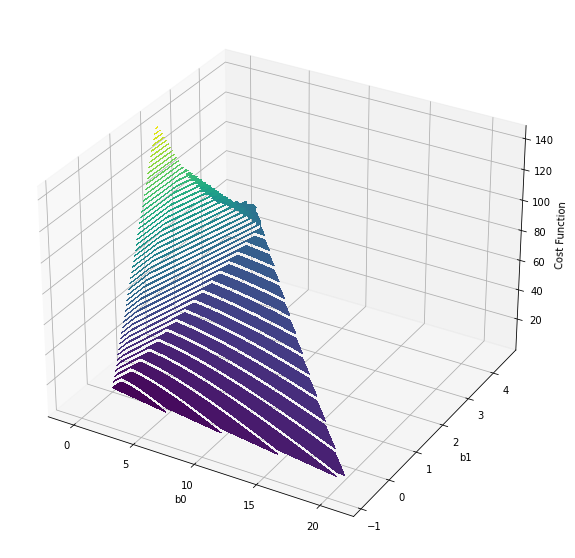

In [27]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
#x,y = np.meshgrid(params_store[0],params_store[1])
ax.tricontourf(params_store[0],params_store[1],cost_hist , 50)
ax.set_xlabel("b0")
ax.set_ylabel("b1")
ax.set_zlabel("Cost Function")
plt.show()

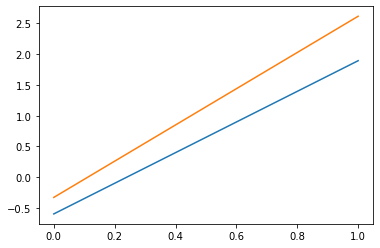

In [28]:
plt.plot(params_store[:,0])
plt.plot(params_store[:,1])

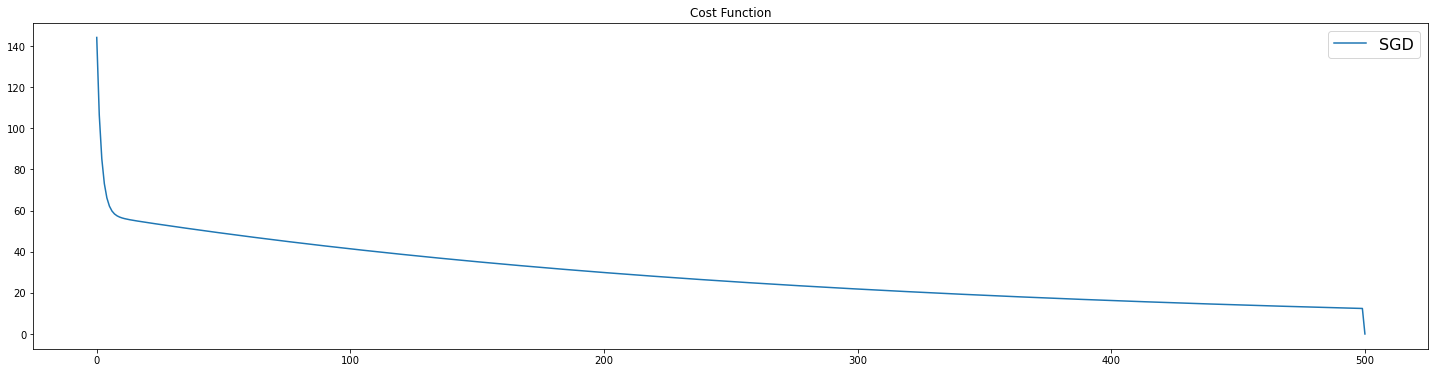

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(cost_hist, label='SGD')
plt.legend(prop={'size': 16})
plt.title("Cost Function")
plt.show()

In [30]:
x_train_ = weight.reshape((-1,1))
y_train_ = mpg.reshape((-1,1))

In [31]:
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [32]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [33]:
lr =0.001
n_iter = 1000

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(x_train_,y_train_,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.471,
Theta1:          4.079
Final cost/MSE:  24703.493


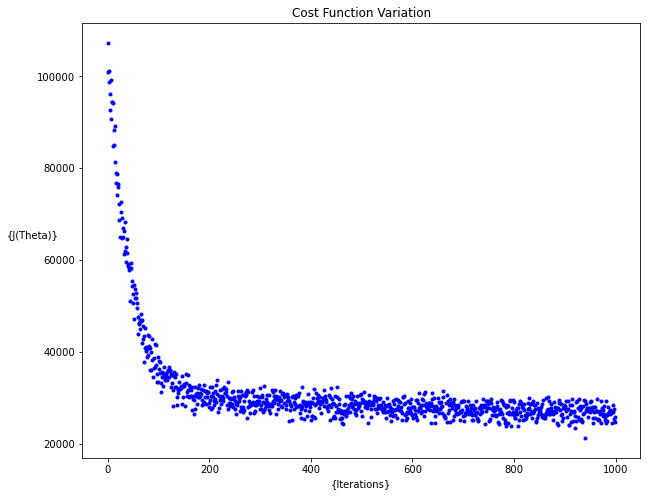

In [34]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
ax.set_title("Cost Function Variation")
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')